In [5]:
#Cargamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
from datetime import datetime, timedelta
import matplotlib.cm as cm 

n_fish = 6
#Definimos parametros
data_folder = '/Volumes/Expansion/Datos G. omarorum/FB-DOE/' #Cambiar ruta a la carpeta donde estan los archivos .pkl (obtenidos de EOD_analysis)
os.chdir(data_folder)

In [6]:
files = sorted(glob.glob('*pkl'))
files

['fish1_FB-DOE.pkl',
 'fish2_FB-DOE.pkl',
 'fish3_FB-DOE.pkl',
 'fish4_FB-DOE.pkl',
 'fish5_FB-DOE.pkl',
 'fish6_FB-DOE.pkl']

In [7]:
histograms = []
times = pd.DataFrame(np.zeros(shape=(55,len(files))), columns=files)

In [8]:
for j in range(len(files)):
    with open(files[j], 'rb') as file:  
        FB_doe = pickle.load(file)
    
    midnight = datetime.strptime(list(FB_doe['FB-DOE'].keys())[0][:-1], '%Y-%m-%dT%H_%M_%S').replace(hour=0, minute=0, second=0, microsecond=0)

    plt.figure()
    for key in FB_doe['FB-DOE'].keys():  
        hist, edges = np.histogram(FB_doe['FB-DOE'][key], bins=10, density=True)
        histograms.append((hist, edges))
    


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [62]:
legends = [str(x) + ' hs' for x in range(17,24)] + [str(x) + ' hs' for x in range(11)]
print(legends)

['17 hs', '18 hs', '19 hs', '20 hs', '21 hs', '22 hs', '23 hs', '0 hs', '1 hs', '2 hs', '3 hs', '4 hs', '5 hs', '6 hs', '7 hs', '8 hs', '9 hs', '10 hs']


/var/folders/dk/0fvz37fn27l9149spycxsyf80000gp/T/ipykernel_43230/3299947927.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Pastel1')
/var/folders/dk/0fvz37fn27l9149spycxsyf80000gp/T/ipykernel_43230/3299947927.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


IndexError: list index out of range

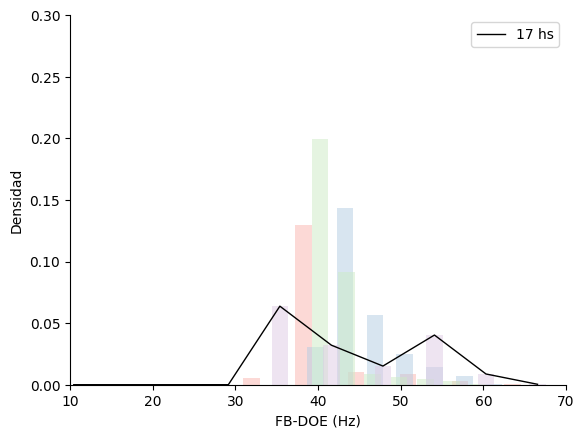

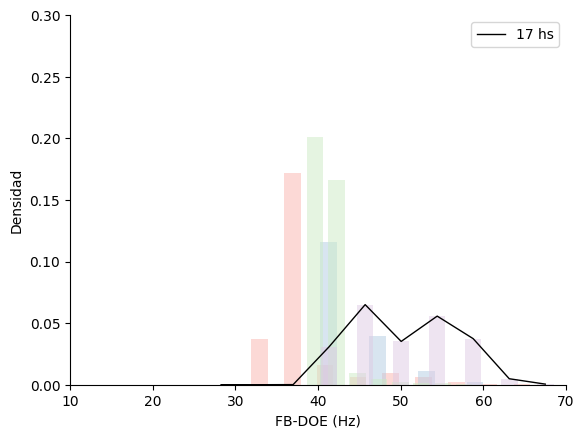

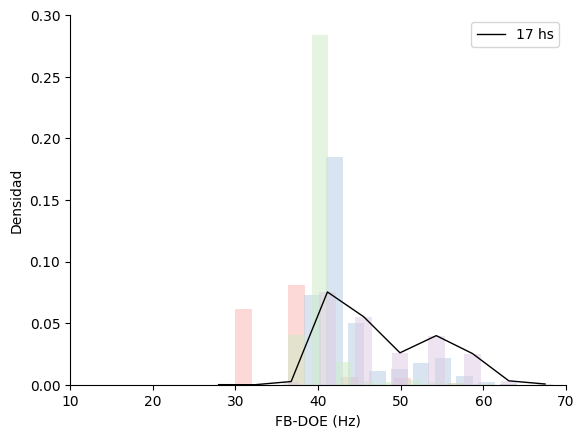

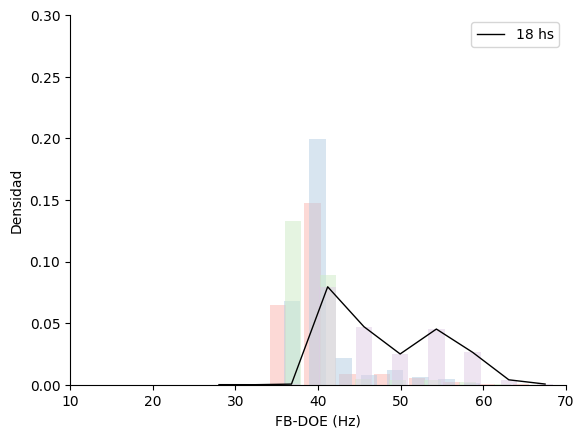

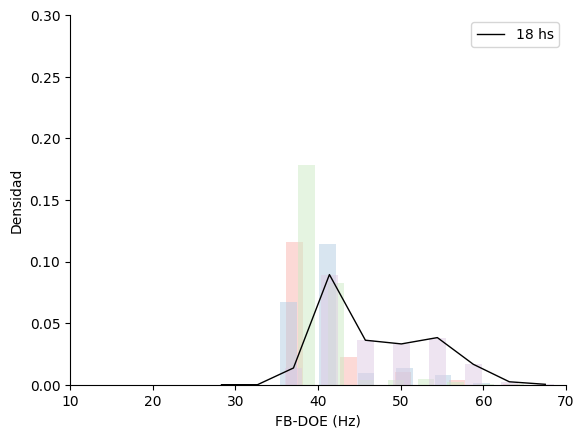

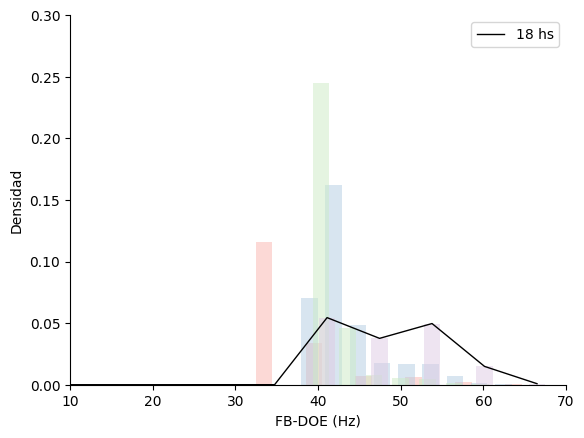

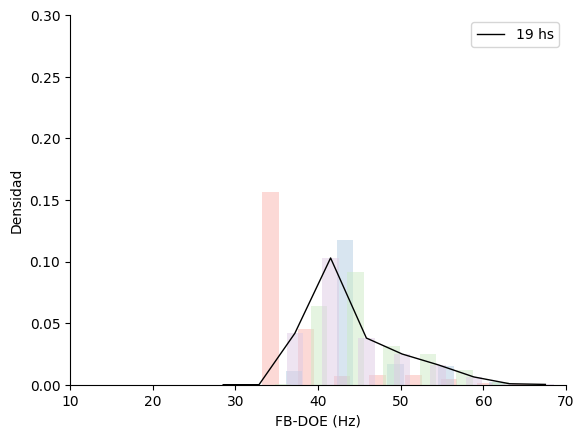

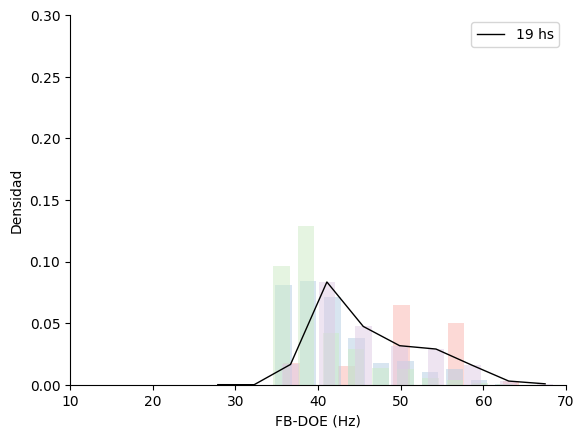

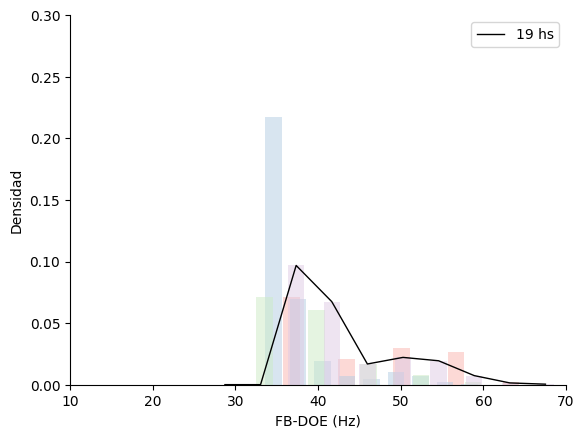

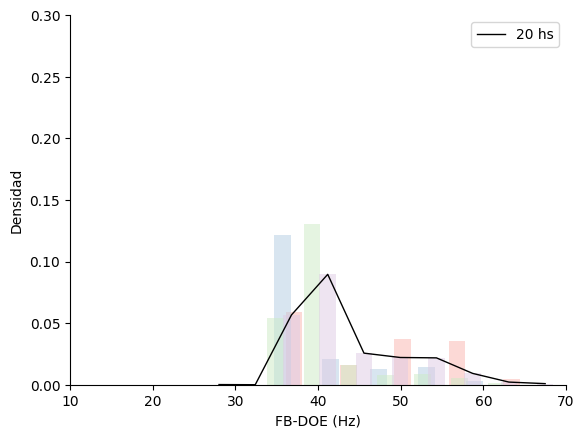

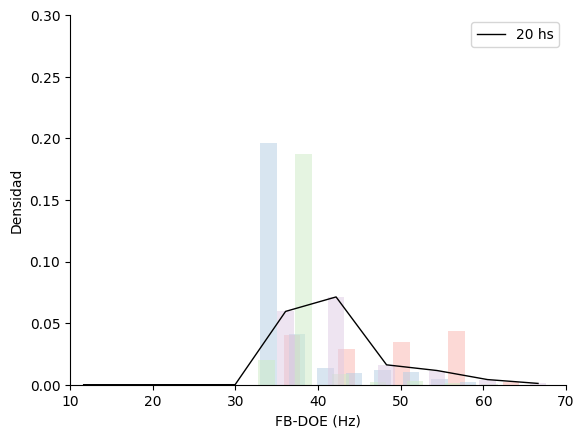

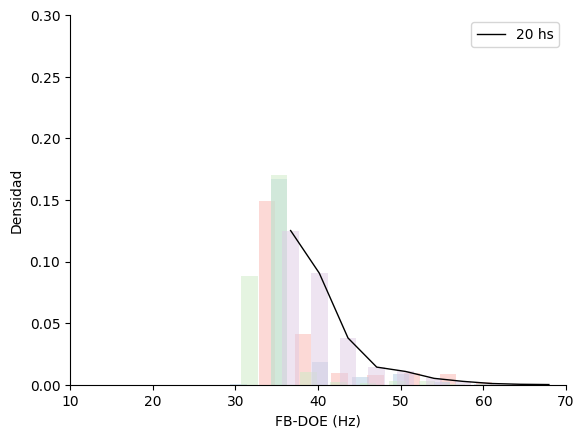

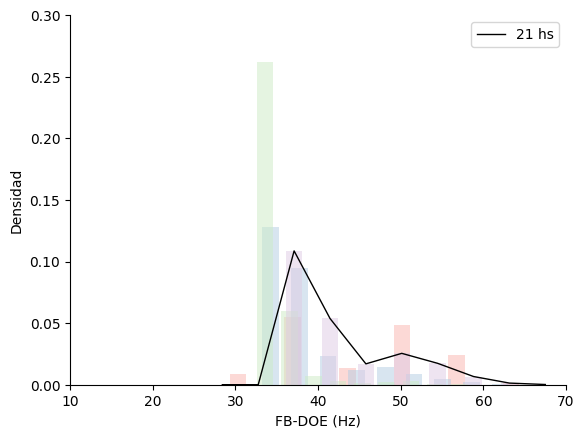

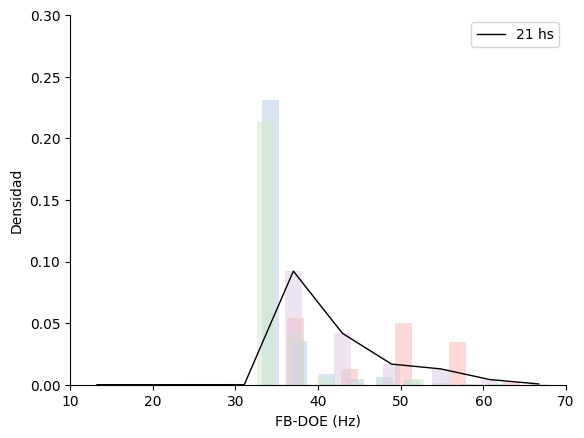

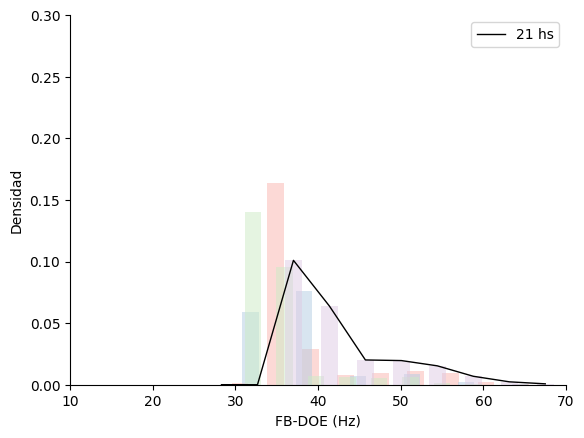

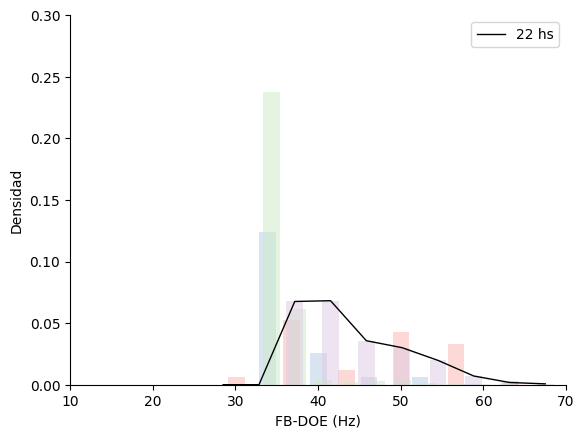

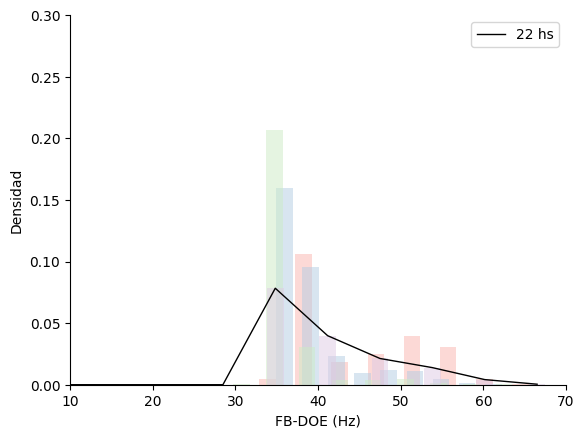

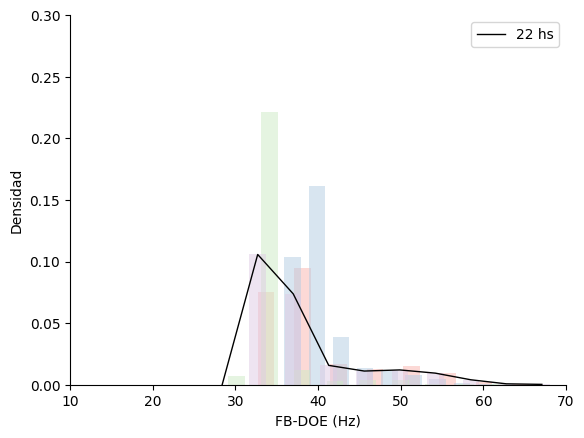

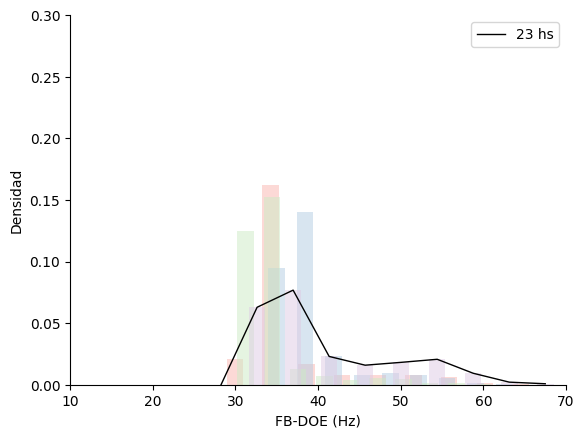

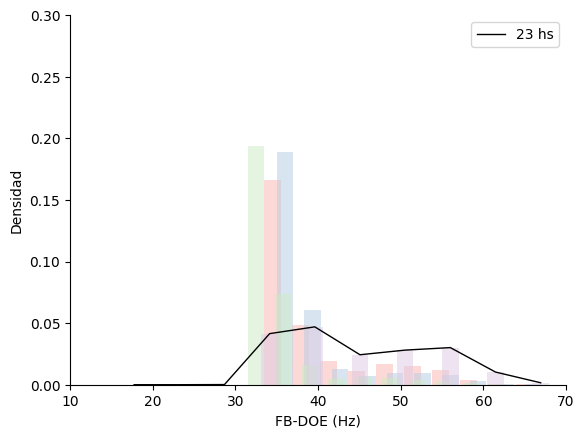

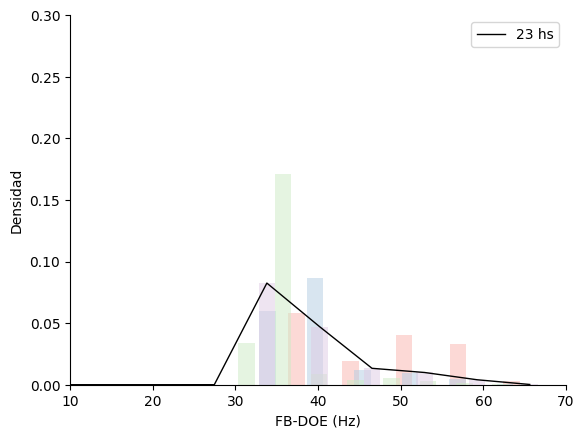

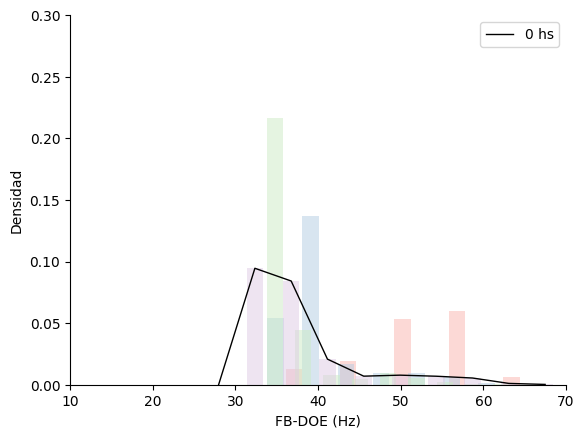

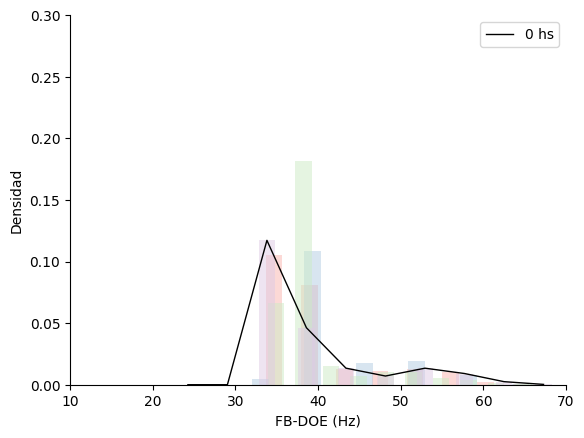

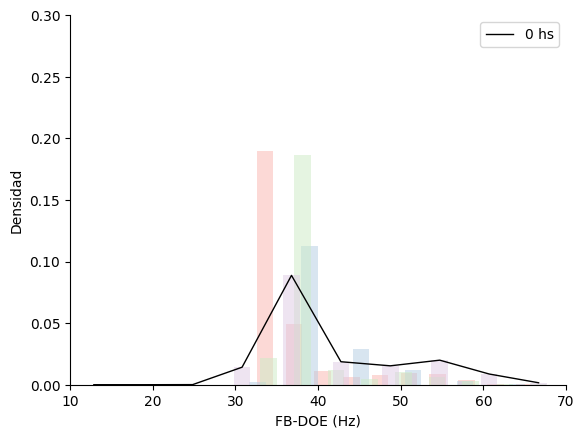

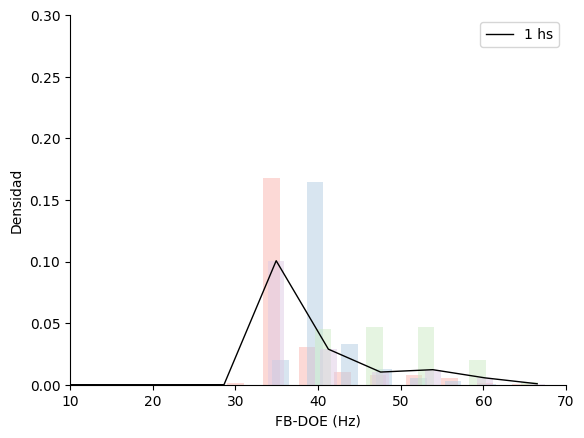

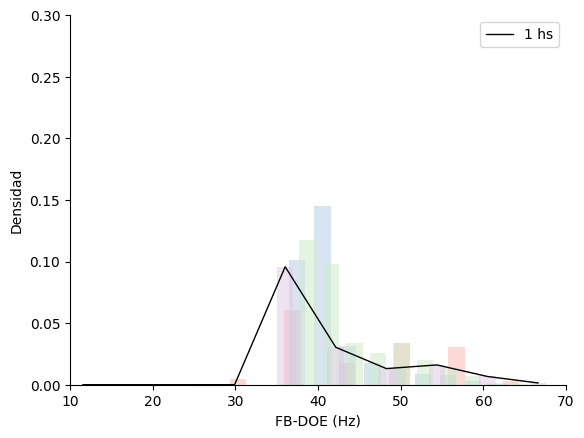

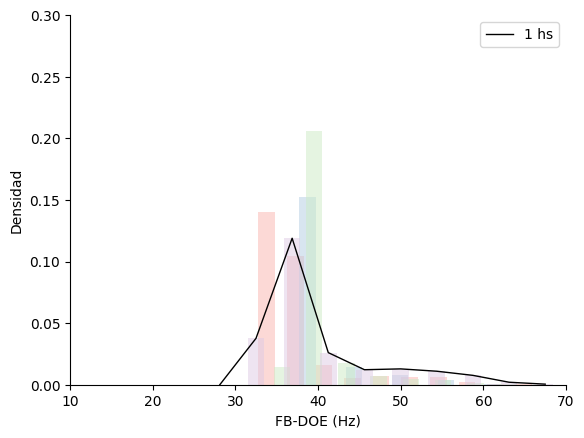

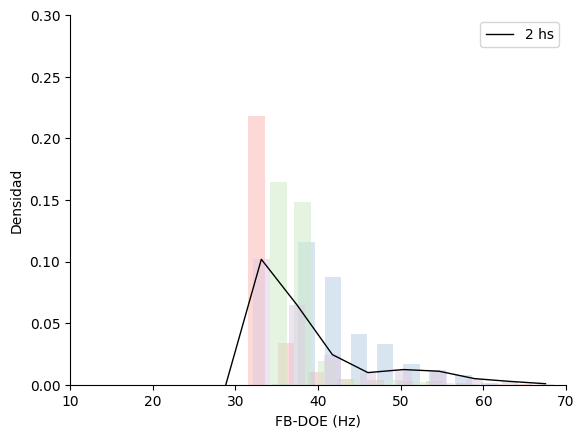

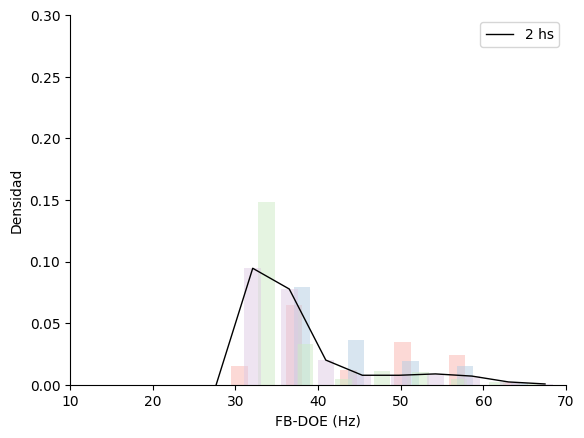

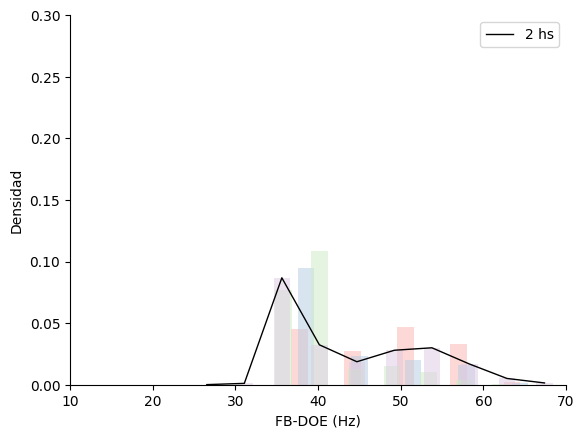

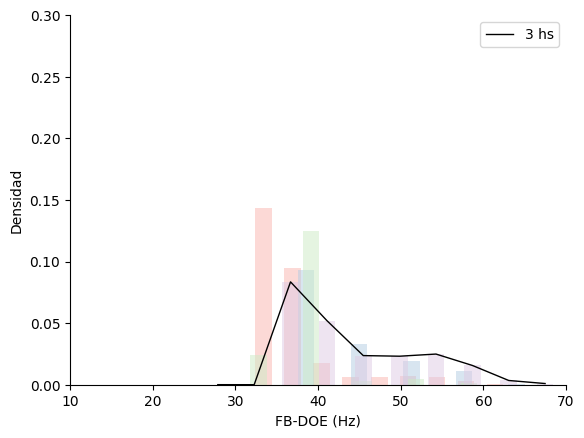

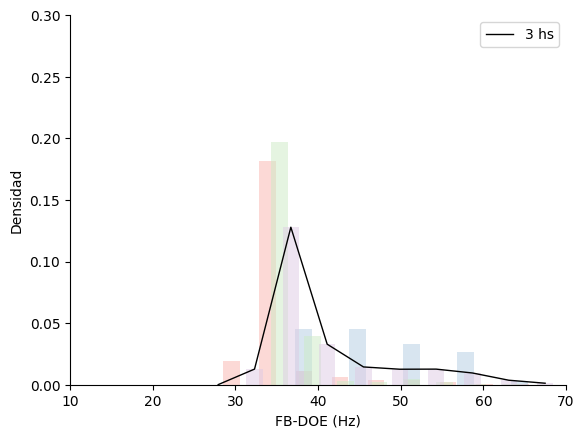

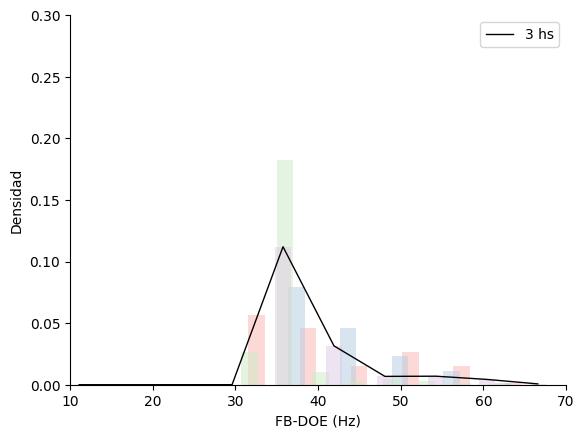

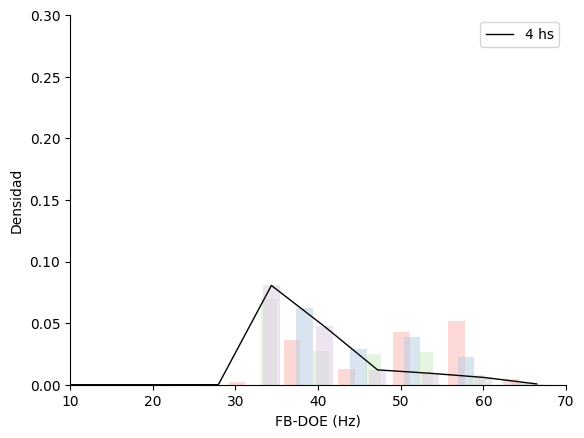

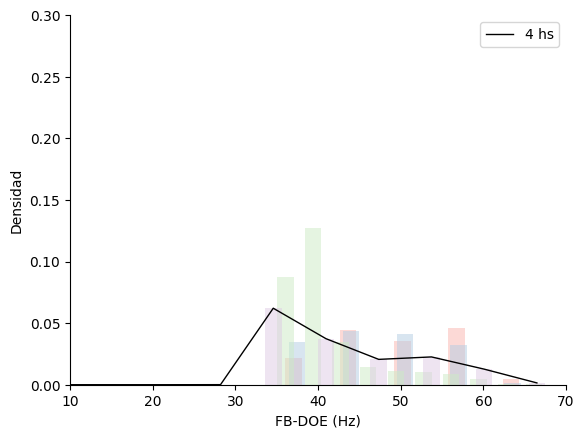

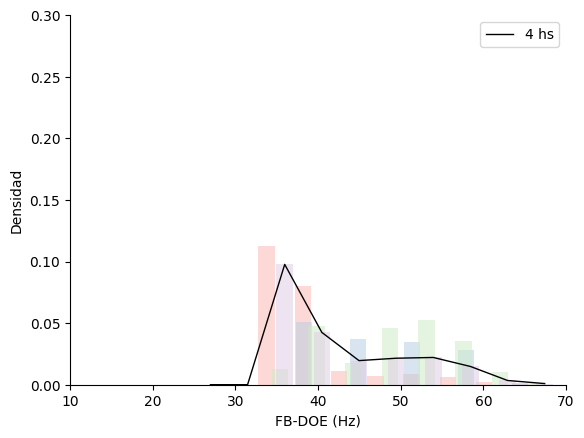

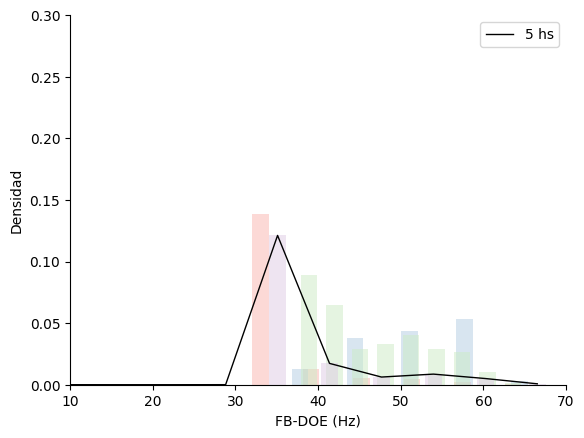

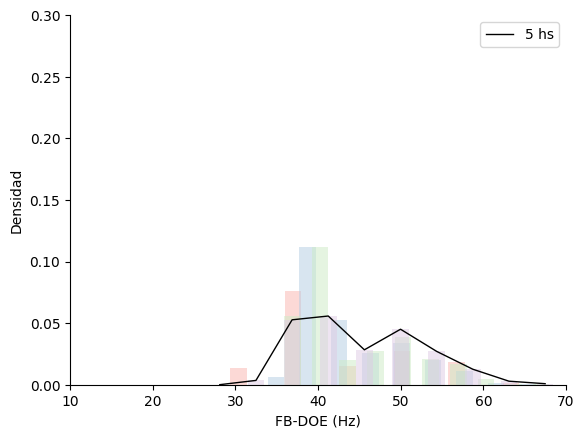

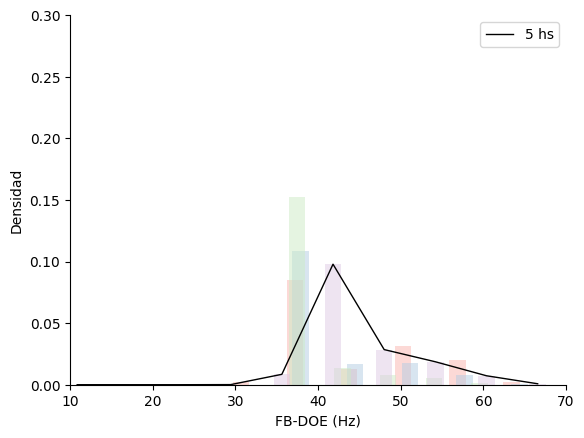

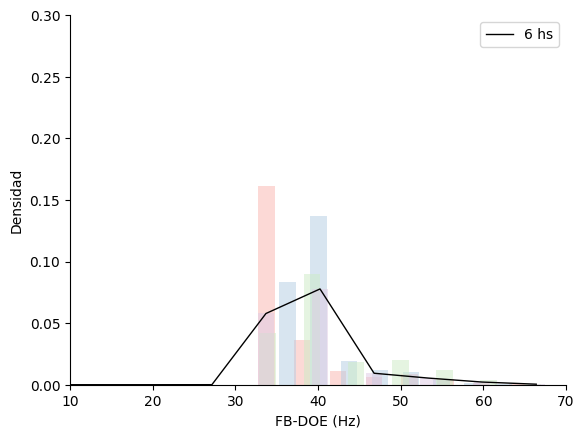

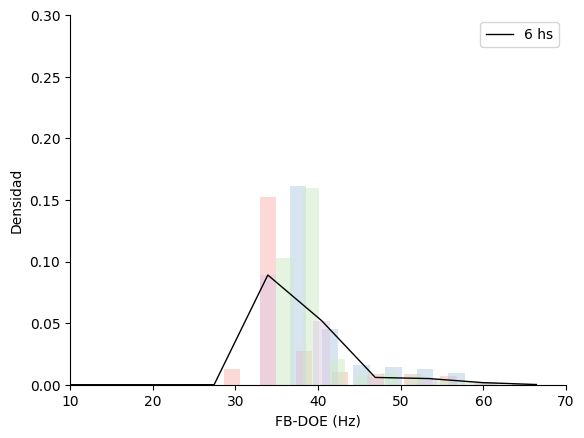

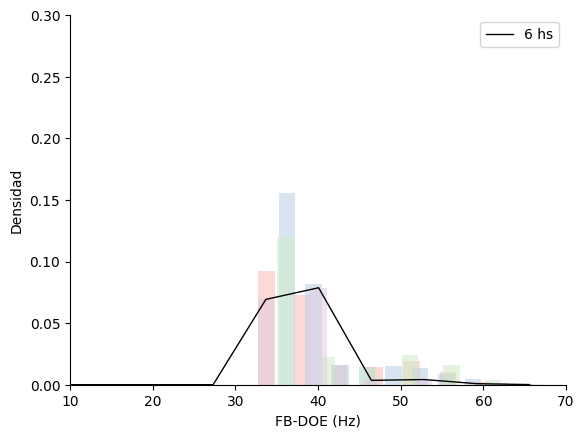

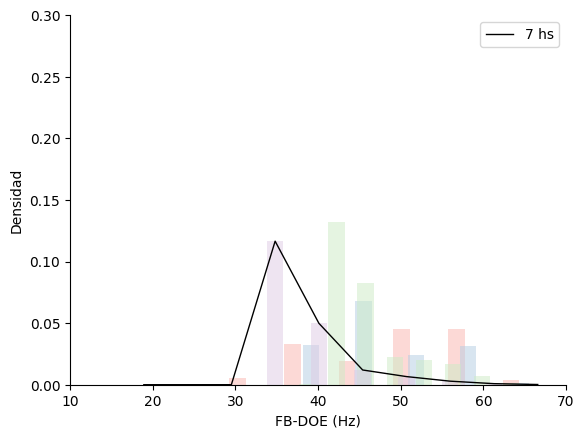

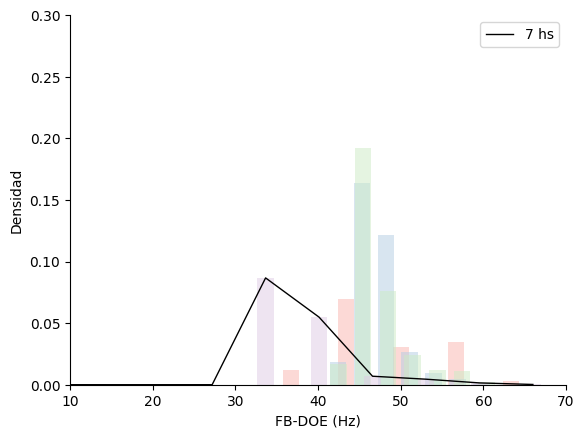

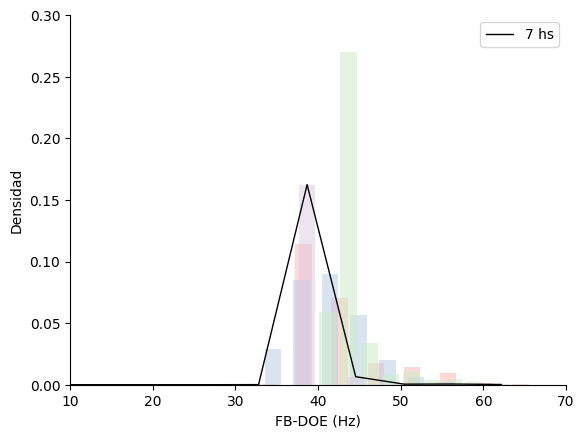

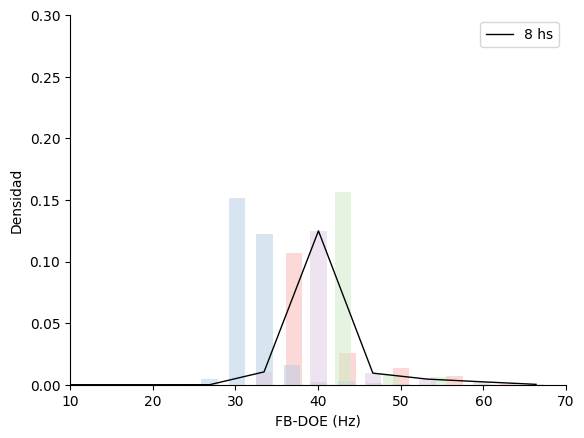

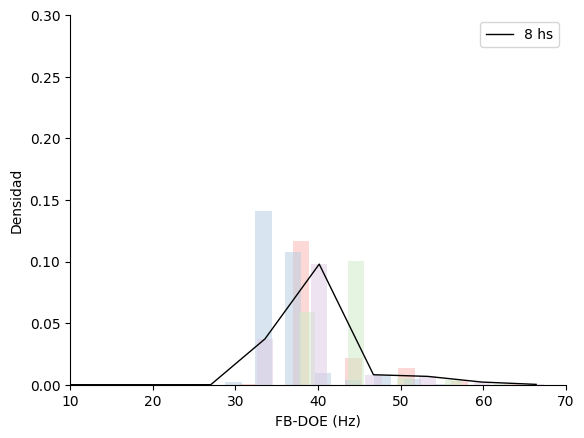

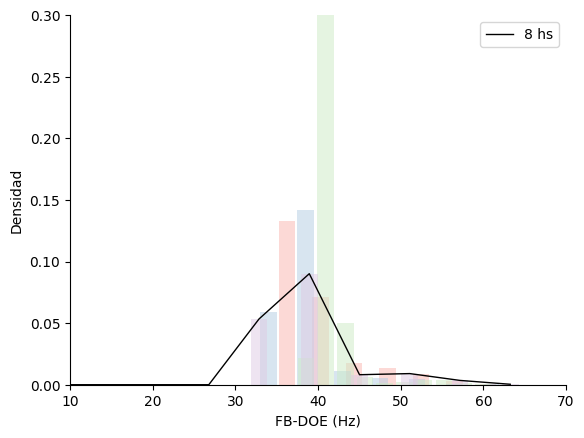

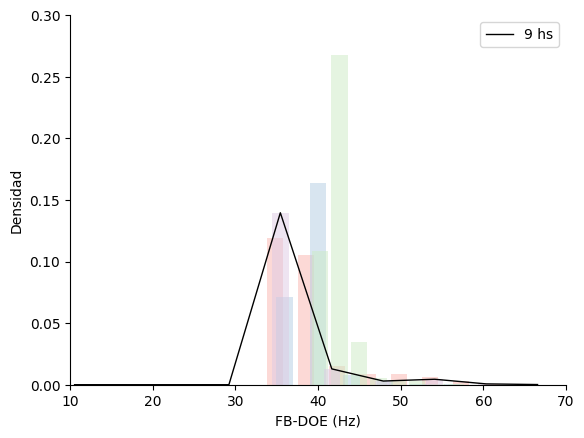

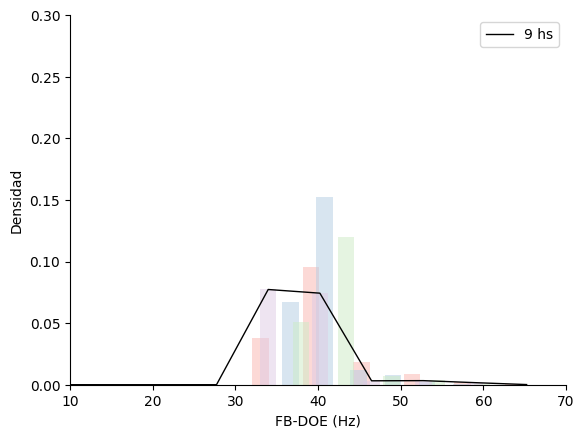

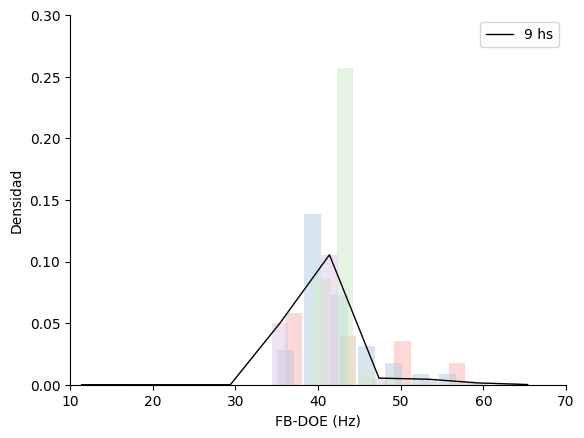

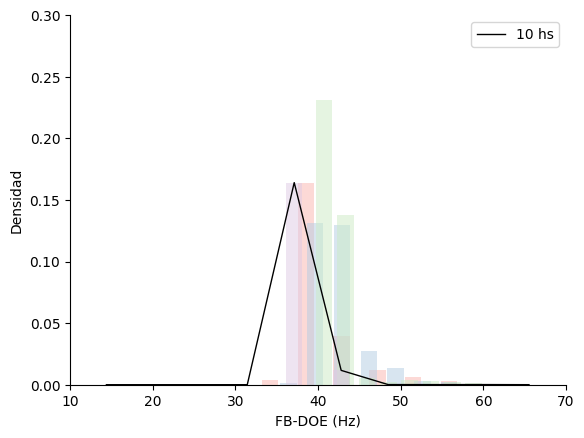

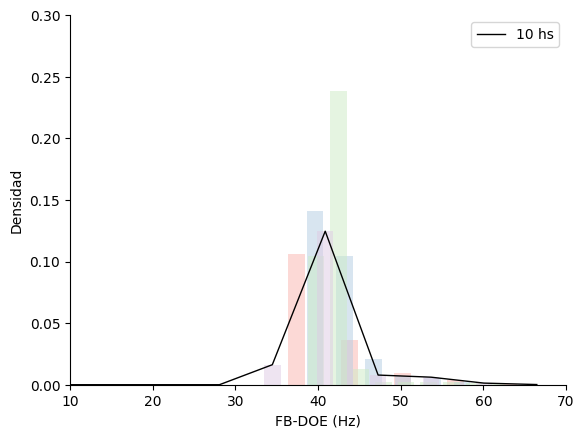

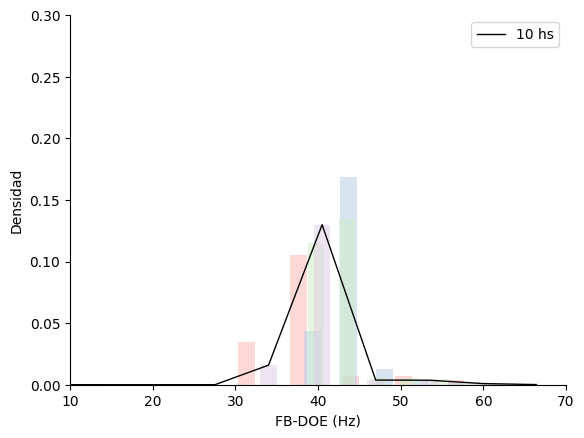

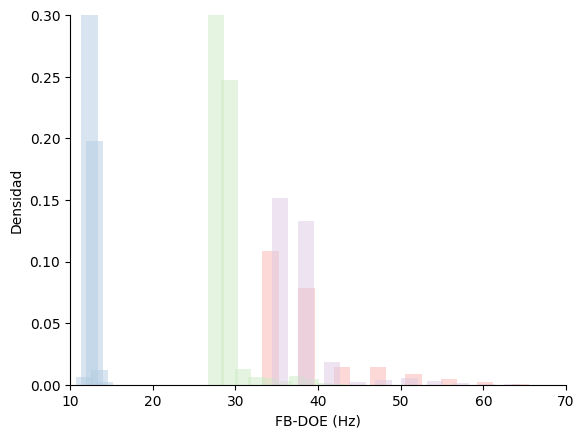

In [63]:
indices_to_plot = [0, 55, 110, 165]

colormap = cm.get_cmap('Pastel1')
colors = [colormap(i) for i in range(n_fish)]
s=0
a=0
for j in range(55):
    hists = []

    fig, ax = plt.subplots()
    i = 0
    for index in indices_to_plot:
        hist, edges = histograms[index]

        bin_centers = (edges[:-1] + edges[1:]) / 2

        ax.bar(bin_centers + i, hist, color=colors[i], alpha=.5, width=2)   
        ax.set(xlabel= 'FB-DOE (Hz)', ylabel = 'Densidad', xlim= [10,70], ylim =[0,0.3])
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        i += 1 
        

    hist_values = np.zeros((len(indices_to_plot), len(edges) - 1))

    for i, index in enumerate(indices_to_plot):
        hist_values[i, :] = hist


    stacked_data = np.vstack(hist_values)
    median_values = np.median(stacked_data, axis=0)
    ax.plot(bin_centers+i,
         median_values, color='black', linestyle='-', linewidth=1, label=legends[s])
    plt.legend()
    indices_to_plot = [x+1 for x in indices_to_plot]
    name = 'Freq_hist_' + str(indices_to_plot[0]) + '.png'
    fig.savefig(name)
    a += 1
    if a == 3:
        s +=1 
        a = 0

In [68]:
histogramas = glob.glob('*.png')
image_dir = os.getcwd()
from PIL import Image

# Creamos el gif
output_gif = 'FB_doe_hist.gif'

images = [Image.open(img) for img in histogramas]
images[0].save(output_gif, save_all=True, append_images=images[1:], duration=300, loop=0)

